# The dataset is collected from Department of Information Management, Chung Hua University, Taiwan and Department of Civil Engineering, Tamkang University, Taiwan.
The source URLs for the data is
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients.

# EDA Steps
• Deal with Missing Values if any

• Define data types for each column

• Understand the dataset

• Review Correlation among variables

• Play around with visualizations and visualize subsets

In [0]:
import pandas as pd
from pandas import set_option
import numpy as np
from numpy import argmax
import sklearn
import matplotlib.pyplot as plt
from matplotlib import pyplot
import statsmodels.api as sm
import seaborn as sns
from scipy.io import arff
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from pandas import set_option
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import gc
import matplotlib

In [0]:
Fraud=pd.read_excel('/content/sample_data/default_of_credit_card_clients.xls', skiprows=1)

In [117]:
Fraud.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [118]:
Fraud.shape

(30000, 25)

In [119]:
Fraud.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [120]:
Fraud.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Before cleaning or preparing the data, the summary statistics can be seen above

In [121]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

# Information about the data types. All are int64

In [122]:
print(Fraud.dtypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


# Check for corrupted or missing data

In [123]:
print(Fraud.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


# There is no missing data in the entire dataset.

# Check for Data unbalance

In [124]:
Fraud.groupby('default payment next month').size()

default payment next month
0    23364
1     6636
dtype: int64

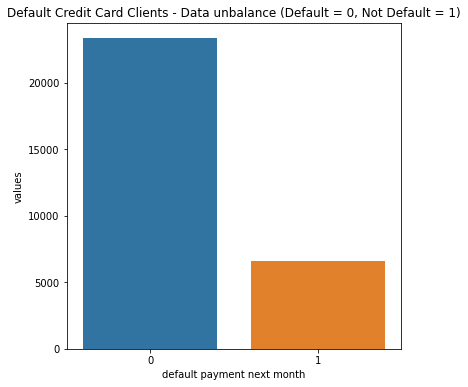

In [125]:
temp = Fraud['default payment next month'].value_counts()
df = pd.DataFrame({'default payment next month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - Data unbalance (Default = 0, Not Default = 1)')
sns.barplot(x = 'default payment next month', y="values", data=df)
plt.show()

# From the target value which is default payment next month, the data has no large unbalance data. 6,636 out of 30,000 of clients will default next month. 

# Exploratory Data Analysis

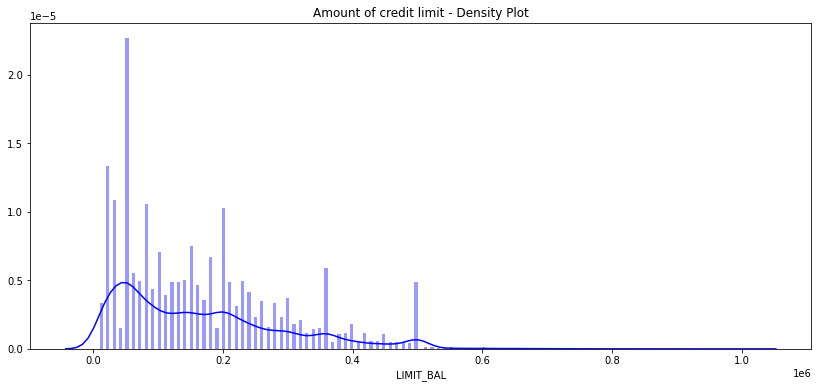

In [126]:
plt.figure(figsize = (14,6))
df = pd.DataFrame({'LIMIT_BAL': temp.index,'values': temp.values})
plt.title('Amount of credit limit - Density Plot')
sns.distplot(Fraud['LIMIT_BAL'],kde=True, bins=200, color='blue')
plt.show()

In [127]:
Fraud['LIMIT_BAL'].value_counts().shape

(81,)

In [128]:
Fraud['LIMIT_BAL'].value_counts().head(5)

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

# From above analysis, the largest number of credit cards are with limit of 50,000, followed by 20,000 and 30,000.

# Let's visualize the density plot for amount of credit limit i.e.  (LIMIT_BAL), grouped by default payment next month.

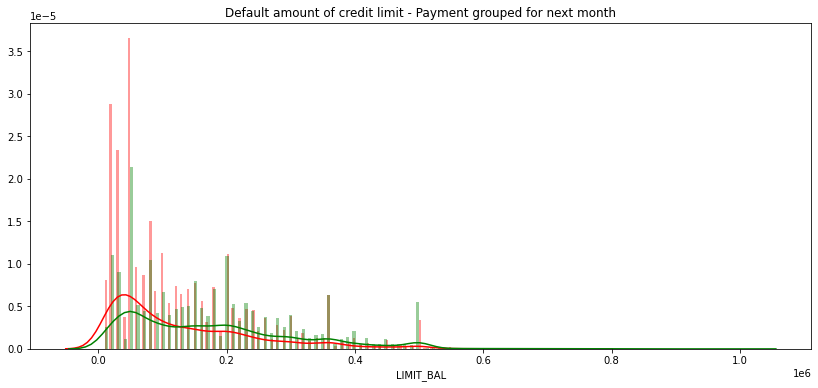

In [129]:
class_0 = Fraud.loc[Fraud['default payment next month'] == 0]['LIMIT_BAL']
class_1 = Fraud.loc[Fraud['default payment next month'] == 1]['LIMIT_BAL']
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit - Payment grouped for next month')
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

# The density for this interval is larger for defaults than non-defaults has most of defaults are for credit limit 0-100,000. Larger defaults number are for the amounts of 20,000, 30,000 and 50,000.

# Credit limit distribution vs. sex where 1 is for male and 2 for female

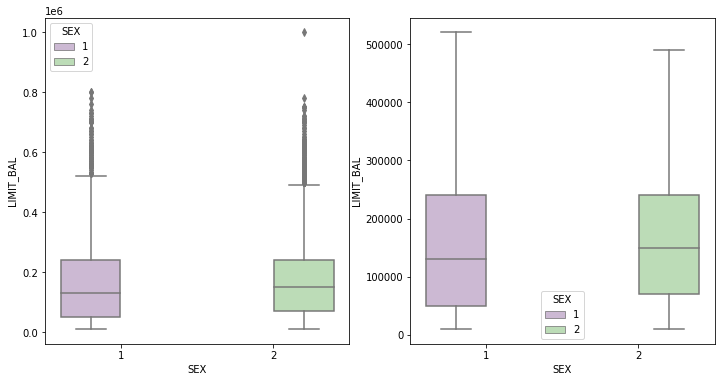

In [130]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=Fraud, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=Fraud, palette="PRGn",showfliers=False)
plt.show();

# From above boxplot, the limit credit amount is quite balanced between sexes. 

# Sex, Education, Age and Marriage Features

# Let's show sex, education, age and marriage distributions.

# I would like to show the boxplots for age distribution grouped by Sex and Marriage.
# Sex: Gender (1=male, 2=female)
# Marriage: Marital status (1=married, 2=single, 3=others)

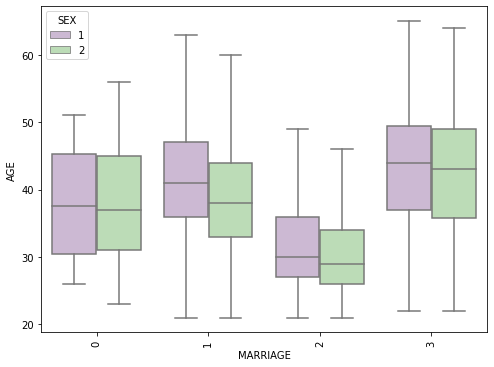

In [131]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1,x=feature1, y=feature2, hue=feature3,
                data=Fraud, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

# I could not specify the marital status 0 as Q1 values are above values for married of both sexes. The marital status 3 (others) has the mean values of over 40 and over 60 of the Q4 values are mostly divorced or widowed.

# Education and marriage

# I would like to show the boxplots for age distribution grouped by education and marriage.

# Where Education: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

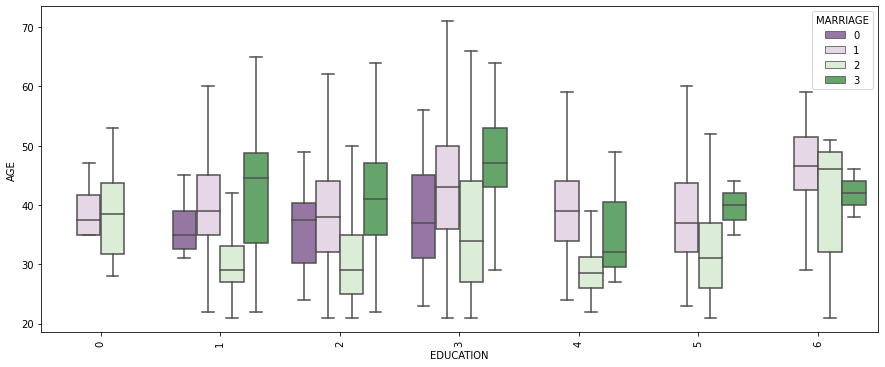

In [132]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',15)

# Credit amount limit, Sex and Age

# I would like to show the boxplots with credit amount limit distribution grouped by sex and age.

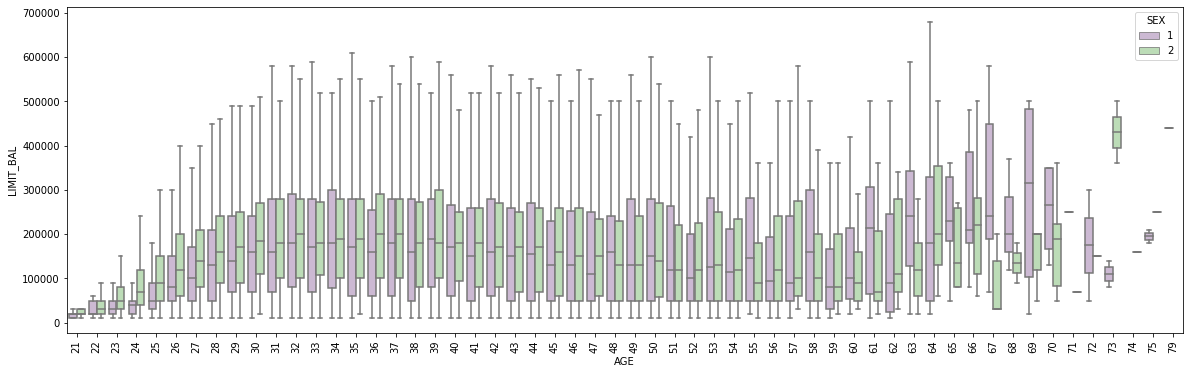

In [133]:
boxplot_variation('AGE','LIMIT_BAL', 'SEX',20)

# From above graph, it was deduced that the age for both male and female are increasing in values for Q3 and Q4 around 35 years. Then, starts to flunctuate and get to a maximum age 64 of Q4 for males 

# Credit amount limit, education and marriage status

# I would like to show the boxplots with credit amount limit distribution grouped by education level and marriage status

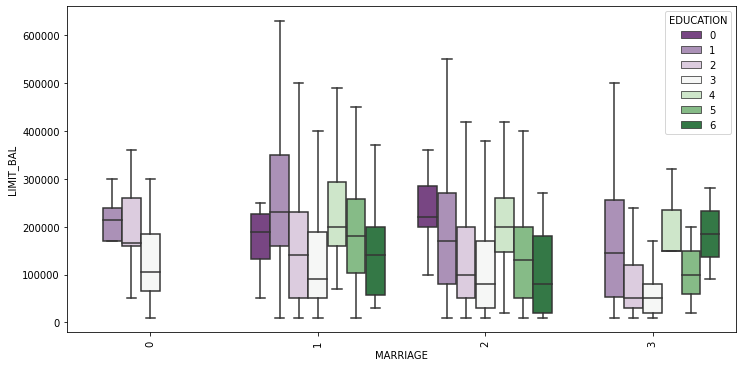

In [134]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

# Features correlation

# Show correlation among variables

# Correlation of Amount of bill statement in April - September 2005.

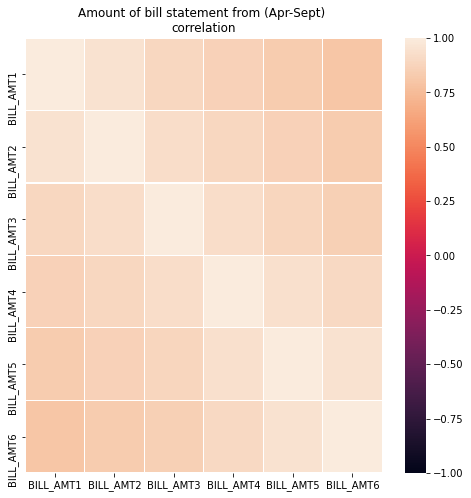

In [135]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
plt.figure(figsize = (8,8))
plt.title('Amount of bill statement from (Apr-Sept) \ncorrelation')
corr = Fraud[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

# We can see Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

# Correlation of Amount of previous payment in April - September 2005.

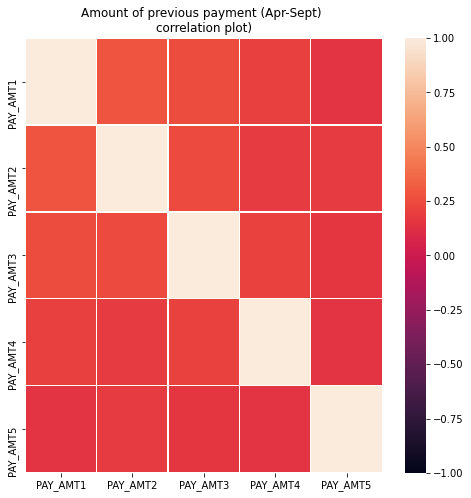

In [136]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']
plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot)')
corr = Fraud[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

# There are no correlations between amounts of previous payments for April-Sept 2005.

# Correlation between Repayment status in April - September 2005.

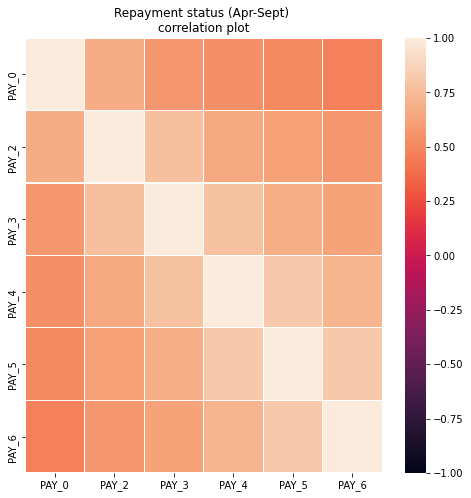

In [137]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot')
corr = Fraud[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

# We can see Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

# Features importance and sort features with Top 12 absolute correlation

In [0]:
ix = abs(Fraud.corr()).sort_values('default payment next month', ascending=False)

In [0]:
 top12_features = ix['default payment next month'].index[:13]

In [140]:
top12_features

Index(['default payment next month', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT4',
       'PAY_AMT3', 'PAY_AMT5'],
      dtype='object')

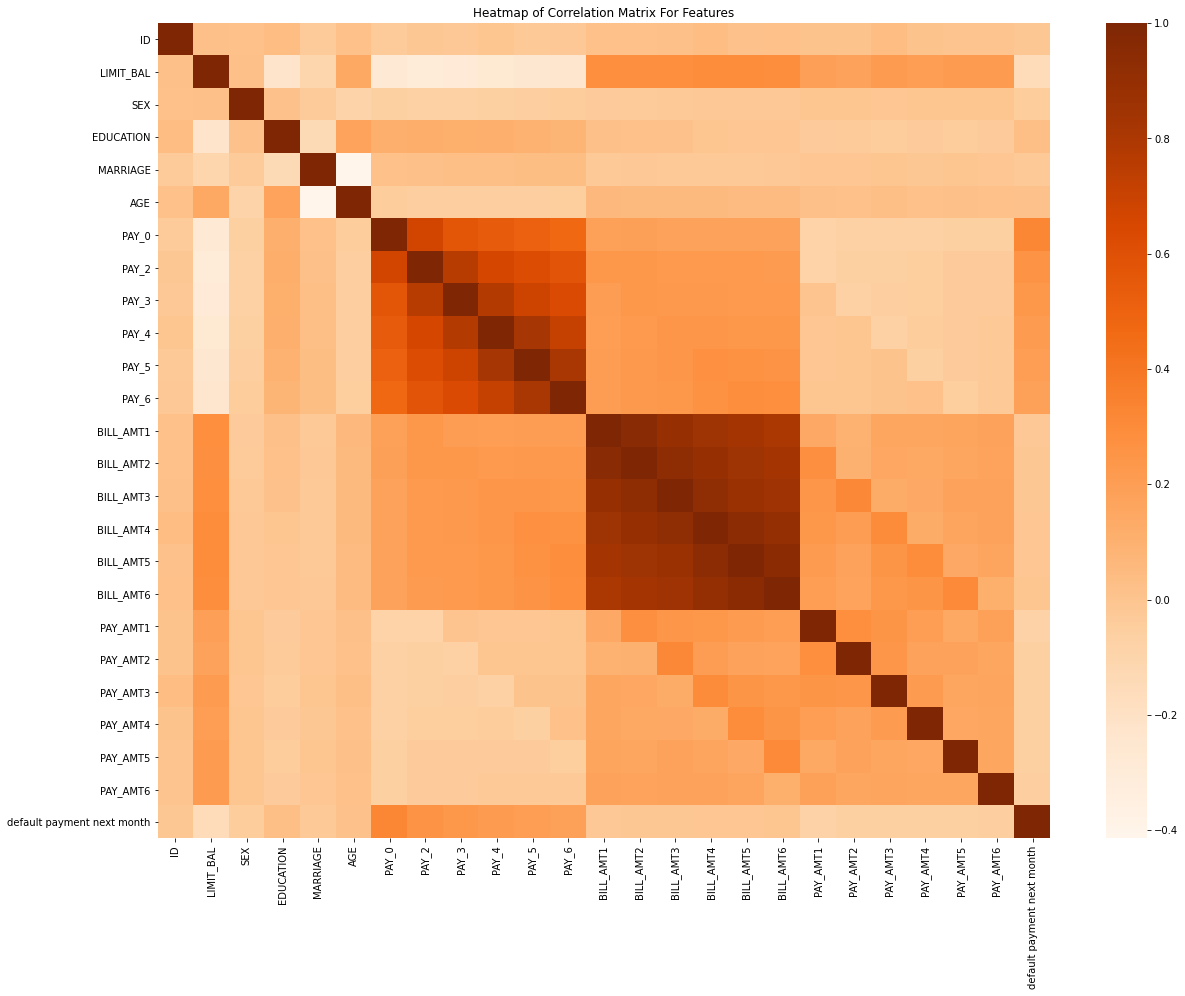

In [141]:
plt.figure(figsize=(20,15))
sns.heatmap(Fraud.corr(), cmap = "Oranges")
plt.title('Heatmap of Correlation Matrix For Features')
plt.show()

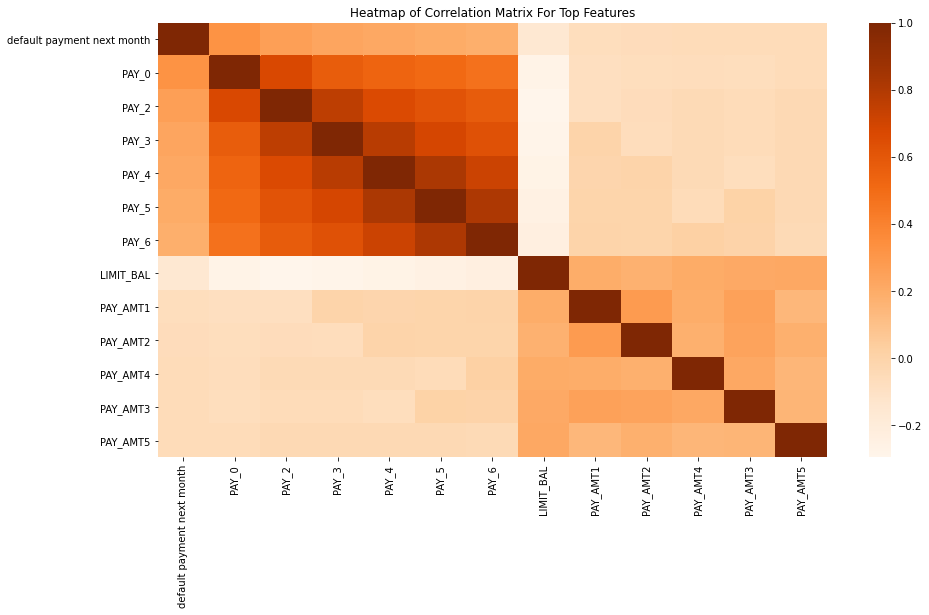

In [142]:
plt.figure(figsize=(15,8))
sns.heatmap(Fraud[top12_features].corr(), cmap = 'Oranges')
plt.title('Heatmap of Correlation Matrix For Top Features')
plt.show()

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
sm = SMOTE(random_state=seed, ratio=1.0)

In [0]:
q=Fraud['PAY_AMT1'].quantile(0.99)
Fraud_1=Fraud[Fraud['PAY_AMT1']<q]
q=Fraud_1['PAY_AMT2'].quantile(0.99)
Fraud_2=Fraud_1[Fraud_1['PAY_AMT2']<q]
q=Fraud_2['BILL_AMT6'].quantile(0.99)
Fraud_3=Fraud_2[Fraud_2['BILL_AMT6']<q]
q=Fraud_3['BILL_AMT6'].quantile(0.99)
Fraud_4=Fraud_3[Fraud_3['PAY_AMT6']<q]
cleaned_Fraud=Fraud_4.reset_index(drop=True)
seed=7
scoring='accuracy'
no_of_fold=10
t=0.2

In [0]:
AR=cleaned_Fraud.values

In [0]:
X=AR[:,:-1]
Y=AR[:,-1]

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [149]:
principalDf.head()

,principal component 1,principal component 2
0,-164461.281665,-51109.690986
1,-99739.455038,25168.995372
2,-90641.131978,-20052.724414
3,-73194.224706,-85342.512306
4,-113702.090486,-52400.820375


In [0]:
finalDf = pd.concat([principalDf, Fraud['default payment next month']], axis = 1)

In [151]:
finalDf.shape

(30000, 3)

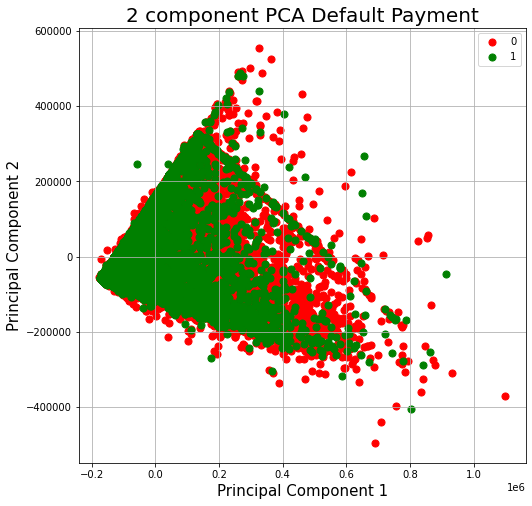

In [153]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA Default Payment', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
 indicesToKeep = finalDf['default payment next month'] == target
 ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
 , finalDf.loc[indicesToKeep, 'principal component 2']
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()

# Modeling

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=t, random_state=seed)

In [0]:
Alg_Mod=[]
Alg_Mod.append(('LR', LogisticRegression()))
Alg_Mod.append(('CARTR', RandomForestClassifier()))
Alg_Mod.append(('CART', DecisionTreeClassifier()))
Alg_Mod.append(('KNNC', KNeighborsClassifier()))
Alg_Mod.append(('NB', GaussianNB()))

In [156]:
res=[]
names=[]
for name,model in Alg_Mod:
  kf=KFold(n_splits=no_of_fold, random_state=seed)
  cv_result=cross_val_score(model, x_train, y_train, cv=kf, scoring=scoring)
  res.append(cv_result)
  names.append(name)
  msg='%s:%f (%f)' % (name,cv_result.mean(), cv_result.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR:0.774550 (0.008786)
CARTR:0.813872 (0.007853)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART:0.721947 (0.008791)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNNC:0.744939 (0.011143)
NB:0.454424 (0.011432)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
pipelines=[]
pipelines.append(('ScaledLR',Pipeline([('Scaler', StandardScaler()),\
('LR',LogisticRegression())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler', StandardScaler()),\
('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledCARTR',Pipeline([('Scaler', StandardScaler()),\
('CARTR',RandomForestClassifier())])))
pipelines.append(('ScaledNB',Pipeline([('Scaler', StandardScaler()),\
('NB', GaussianNB())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler', StandardScaler()),\
('KNNC', KNeighborsClassifier())])))

In [158]:
res=[]
names=[]
for name,model in pipelines:
  kf=KFold(n_splits=no_of_fold, random_state=seed)
  cv_result=cross_val_score(model, x_train, y_train, cv=kf, scoring=scoring)
  res.append(cv_result)
  names.append(name)
  msg='%s:%f (%f)' % (name,cv_result.mean(), cv_result.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledLR:0.804504 (0.009612)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledCART:0.720873 (0.009129)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledCARTR:0.813787 (0.008660)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledNB:0.744209 (0.012175)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledKNN:0.787056 (0.006509)


# Decision Tree

In [159]:
CART=DecisionTreeClassifier()
CART.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
pred=CART.predict(x_test)

In [161]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7255070470952217
[[3668  884]
 [ 713  553]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      4552
           1       0.38      0.44      0.41      1266

    accuracy                           0.73      5818
   macro avg       0.61      0.62      0.62      5818
weighted avg       0.74      0.73      0.73      5818



In [162]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
CART_probs = CART.predict_proba(x_test)
# keep probabilities for the positive outcome only
CART_probs = CART_probs[:, 1]
# predict class values
#yhat = model.predict(testX)
yhat = CART.predict(x_test)
CART_precision, CART_recall, _ = precision_recall_curve(y_test, CART_probs)
CART_f1, CART_auc = f1_score(y_test, yhat), auc(CART_recall, CART_precision
)
# summarize scores
print('DecisionTree: f1=%.3f auc=%.3f' % (CART_f1, CART_auc))

DecisionTree: f1=0.409 auc=0.472


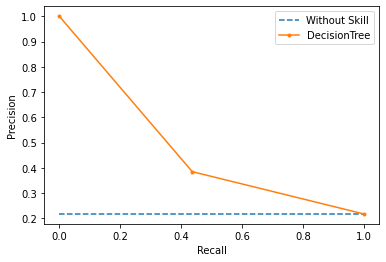

In [163]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--'
, label='Without Skill')
plt.plot(CART_recall, CART_precision, marker='.', label='DecisionTree')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Logistic Regression

In [164]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred=LR.predict(x_test)

In [166]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7820556892402888
[[4550    2]
 [1266    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4552
           1       0.00      0.00      0.00      1266

    accuracy                           0.78      5818
   macro avg       0.39      0.50      0.44      5818
weighted avg       0.61      0.78      0.69      5818



In [167]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
LR_probs = LR.predict_proba(x_test)
# keep probabilities for the positive outcome only
LR_probs = LR_probs[:, 1]
# predict class values
#yhat = model.predict(testX)
yhat = LR.predict(x_test)
LR_precision, LR_recall, _ = precision_recall_curve(y_test, LR_probs)
LR_f1, LR_auc = f1_score(y_test, yhat), auc(LR_recall, LR_precision
)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (LR_f1, LR_auc))

Logistic: f1=0.000 auc=0.323


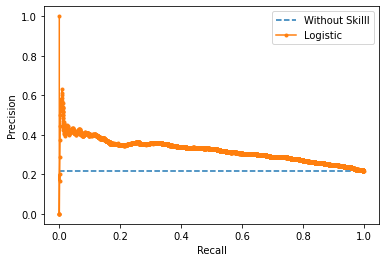

In [168]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--'
, label='Without Skilll')
plt.plot(LR_recall, LR_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# KNeighborsClassifier

In [169]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
pred=KNN.predict(x_test)

In [171]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.750429700928154
[[4140  412]
 [1040  226]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4552
           1       0.35      0.18      0.24      1266

    accuracy                           0.75      5818
   macro avg       0.58      0.54      0.54      5818
weighted avg       0.70      0.75      0.72      5818



In [172]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
KNN_probs = KNN.predict_proba(x_test)
# keep probabilities for the positive outcome only
KNN_probs = KNN_probs[:, 1]
# predict class values
#yhat = model.predict(testX)
yhat = KNN.predict(x_test)
KNN_precision, KNN_recall, _ = precision_recall_curve(y_test, KNN_probs)
KNN_f1, KNN_auc = f1_score(y_test, yhat), auc(KNN_recall, KNN_precision
)
# summarize scores
print('KNeighbors: f1=%.3f auc=%.3f' % (LR_f1, LR_auc))

KNeighbors: f1=0.000 auc=0.323


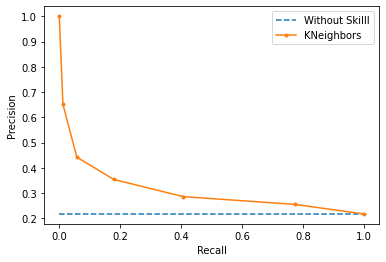

In [173]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--'
, label='Without Skilll')
plt.plot(KNN_recall, KNN_precision, marker='.', label='KNeighbors')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# GaussianNB

In [174]:
NB=GaussianNB()
NB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
pred=NB.predict(x_test)

In [176]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.44517016156754896
[[1573 2979]
 [ 249 1017]]
              precision    recall  f1-score   support

           0       0.86      0.35      0.49      4552
           1       0.25      0.80      0.39      1266

    accuracy                           0.45      5818
   macro avg       0.56      0.57      0.44      5818
weighted avg       0.73      0.45      0.47      5818



In [177]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
NB_probs = NB.predict_proba(x_test)
# keep probabilities for the positive outcome only
NB_probs = NB_probs[:, 1]
# predict class values
#yhat = model.predict(testX)
yhat = NB.predict(x_test)
NB_precision, NB_recall, _ = precision_recall_curve(y_test, NB_probs)
NB_f1, NB_auc = f1_score(y_test, yhat), auc(NB_recall, NB_precision
)
# summarize scores
print('GaussianNB: f1=%.3f auc=%.3f' % (NB_f1, NB_auc))

GaussianNB: f1=0.387 auc=0.402


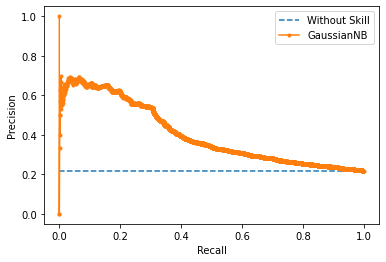

In [178]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--'
, label='Without Skill')
plt.plot(NB_recall, NB_precision, marker='.', label='GaussianNB')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Final model is Random Forest Classifier

In [179]:
RFT=RandomForestClassifier(n_estimators=80,criterion='gini',random_state=seed)
RFT.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [0]:
pred=RFT.predict(x_test)

In [181]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8210725335166724
[[4294  258]
 [ 783  483]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4552
           1       0.65      0.38      0.48      1266

    accuracy                           0.82      5818
   macro avg       0.75      0.66      0.69      5818
weighted avg       0.80      0.82      0.80      5818



# We need to focus more on default payment =1
# Fit a model
# Predict probabilities

In [0]:
RFT_probs = RFT.predict_proba(x_test)

# Keep probabilities for the positive outcome only

In [0]:
RFT_probs = RFT_probs[:, 1]
yhat = RFT.predict(x_test)
RFT_precision, RFT_recall, threshold = precision_recall_curve(y_test, RFT_probs)
fscore = (2 * RFT_precision * RFT_recall) / (RFT_precision + RFT_recall)

# Plot the precision-recall curves for the model
# Locate the index of the largest f score

Best Threshold=0.350000, F-Score=0.539


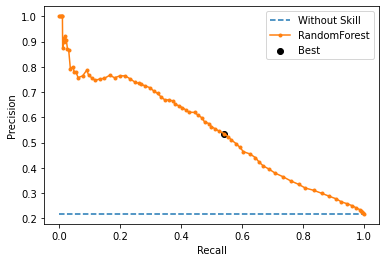

In [184]:
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Without Skill')
plt.plot(RFT_recall, RFT_precision, marker='.', label='RandomForest')
plt.scatter(RFT_recall[ix], RFT_precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()